# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alaghsas
Processing Record 2 of Set 1 | sitka
Processing Record 3 of Set 1 | broken hill
Processing Record 4 of Set 1 | qina
Processing Record 5 of Set 1 | afaahiti
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 1 | sampit
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | huarmey
Processing Record 11 of Set 1 | gaspe
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | sukumo
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | swift current
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | isangel
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | badger
Processing Record 22 of Set 1 | chiboug

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alaghsas,17.0187,8.0168,15.43,21,64,4.77,NE,1736478693
1,sitka,57.0531,-135.3300,6.52,97,100,4.32,US,1736478694
2,broken hill,-31.9500,141.4333,35.00,15,0,0.38,AU,1736478695
3,qina,26.1642,32.7267,13.86,47,0,2.03,EG,1736478696
4,afaahiti,-17.7500,-149.2833,27.14,76,99,5.43,PF,1736478697


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alaghsas,17.0187,8.0168,15.43,21,64,4.77,NE,1736478693
1,sitka,57.0531,-135.3300,6.52,97,100,4.32,US,1736478694
2,broken hill,-31.9500,141.4333,35.00,15,0,0.38,AU,1736478695
3,qina,26.1642,32.7267,13.86,47,0,2.03,EG,1736478696
4,afaahiti,-17.7500,-149.2833,27.14,76,99,5.43,PF,1736478697


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

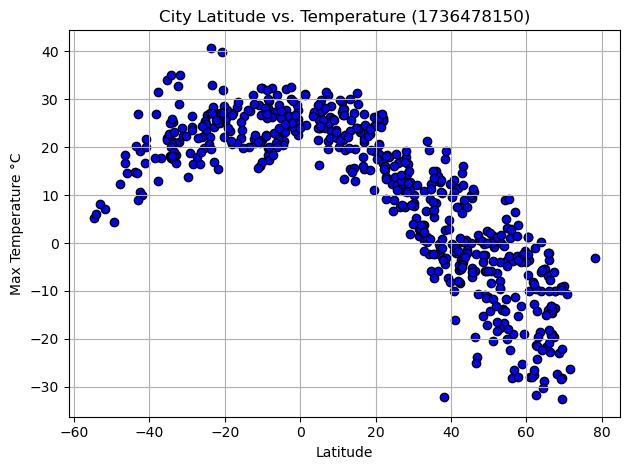

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

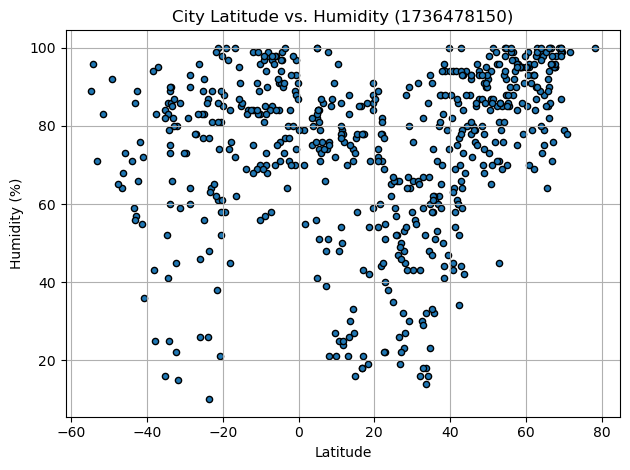

In [24]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

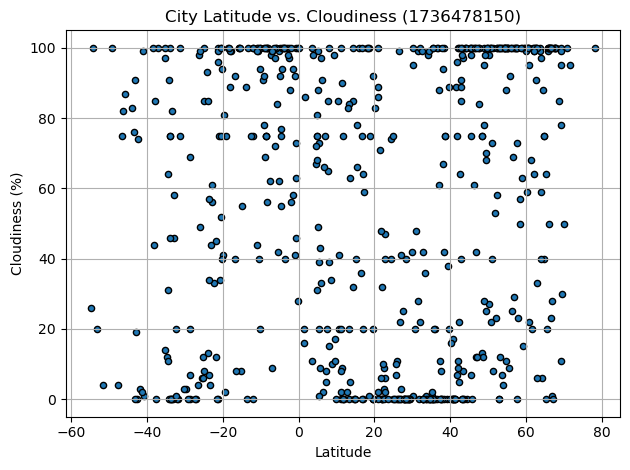

In [25]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

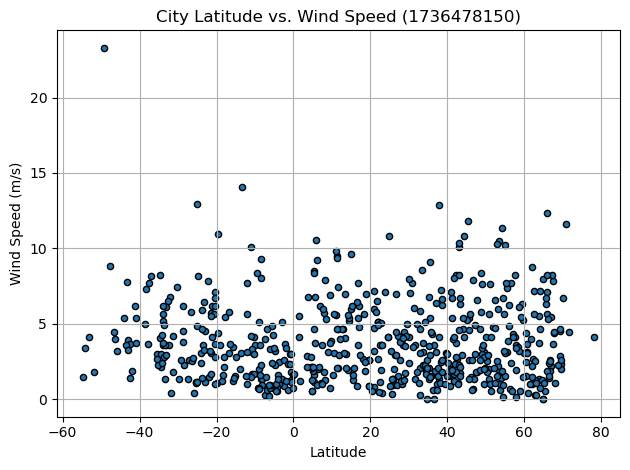

In [26]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='light blue', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, c="blue", marker="o", edgecolor="black", linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alaghsas,17.0187,8.0168,15.43,21,64,4.77,NE,1736478693
1,sitka,57.0531,-135.3300,6.52,97,100,4.32,US,1736478694
3,qina,26.1642,32.7267,13.86,47,0,2.03,EG,1736478696
9,gaspe,48.8334,-64.4819,-0.27,91,100,8.39,CA,1736478704
11,sukumo,32.9333,132.7333,3.70,82,42,5.86,JP,1736478706


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,broken hill,-31.9500,141.4333,35.00,15,0,0.38,AU,1736478695
4,afaahiti,-17.7500,-149.2833,27.14,76,99,5.43,PF,1736478697
5,carnarvon,-24.8667,113.6333,26.66,56,85,8.15,AU,1736478698
6,sampit,-2.5333,112.9500,30.06,71,97,0.86,ID,1736478701
7,adamstown,-25.0660,-130.1015,23.33,83,100,12.91,PN,1736478702


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8734666112179426


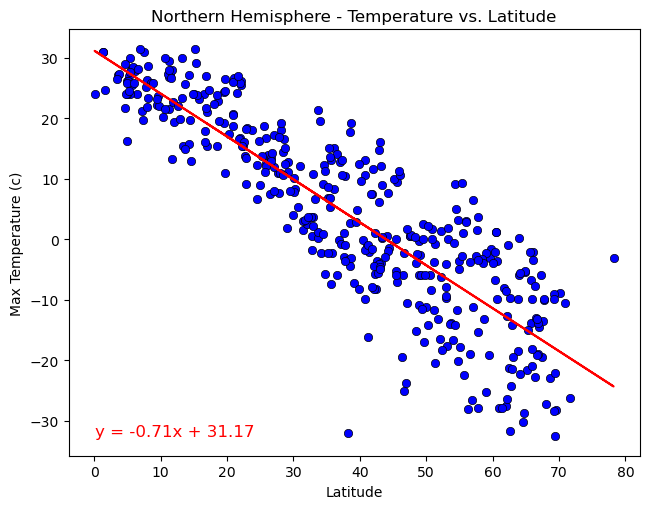

In [54]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.title("Northern Hemisphere - Temperature vs. Latitude")
plt.show()

The r-value is: 0.48843762833317034


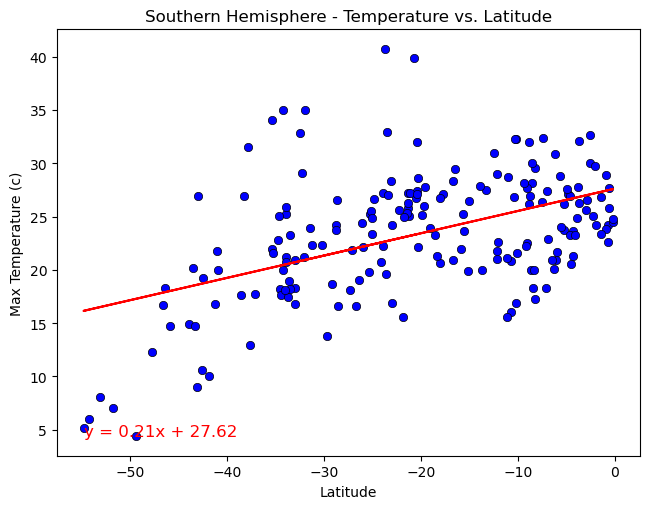

In [55]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.title("Southern Hemisphere - Temperature vs. Latitude")
plt.show()

**Discussion about the linear relationship:** With an r value of -.87 in the northen hemisphere, this shows a strong coorelation between temperature decreasing as latitude increases. With an r value of .488 in the southern hemisphere, this shows a lower but still moderate coorelation between Temperature increasing the closer you get to 0 degrees latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4731759210487937


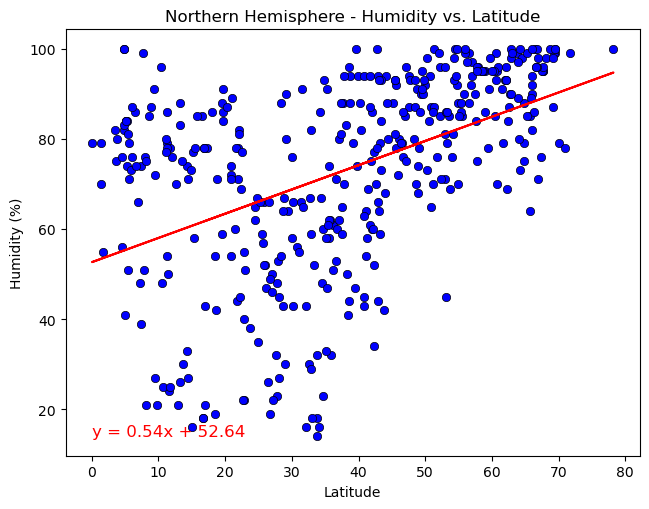

In [56]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.show()

The r-value is: 0.3041984804663223


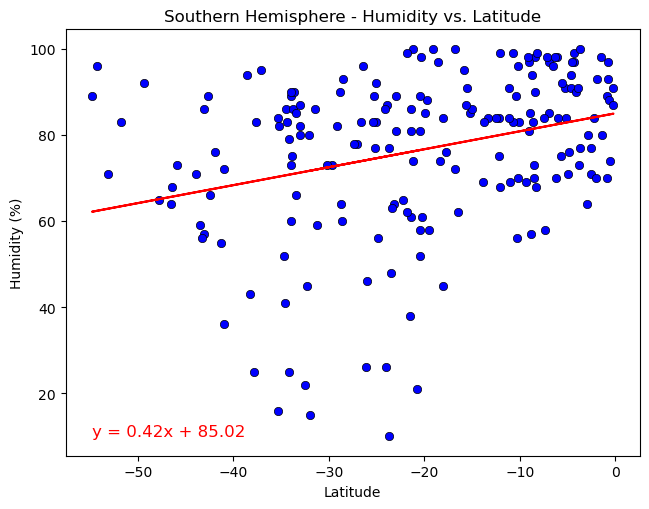

In [57]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.show()

**Discussion about the linear relationship:** Both hemispheres show a weak to possibly moderate coorelation to humidity increasing as latitude increases. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3163707352506865


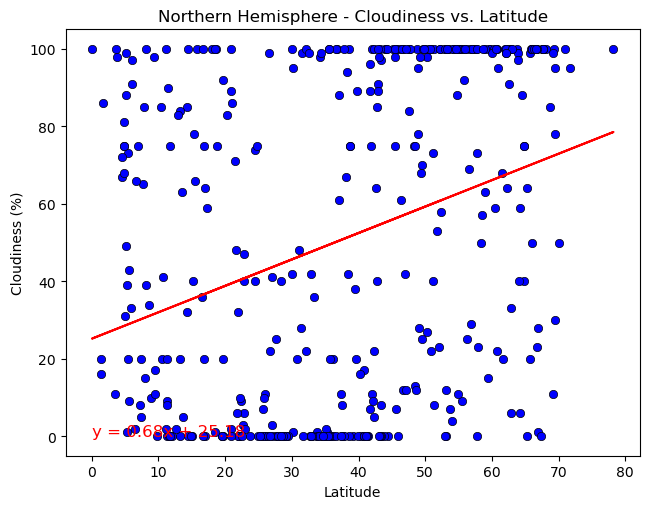

In [64]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.show()

The r-value is: 0.3932904103351389


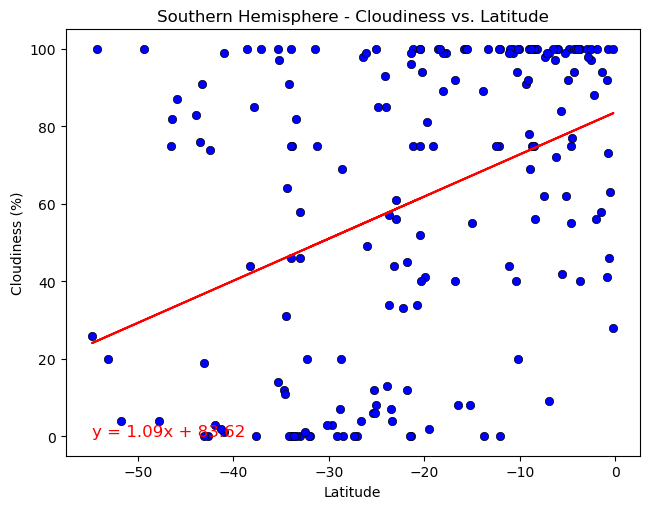

In [65]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.show()

**Discussion about the linear relationship:** Both r values in both hemispheres show a weak of approximately .3 with the relationship betweeen latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.008296985525680445


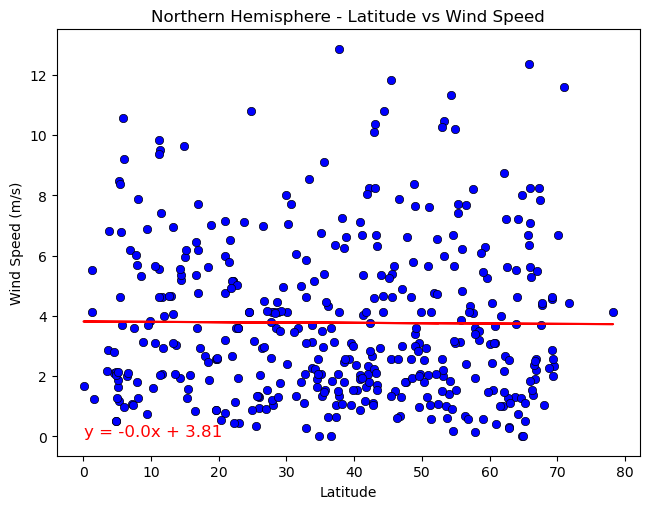

In [67]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere - Latitude vs Wind Speed")
plt.show()

The r-value is: -0.3128150614790045


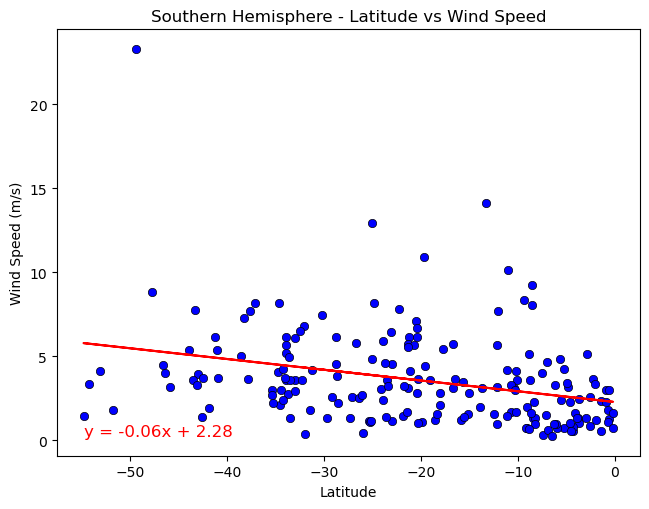

In [66]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere - Latitude vs Wind Speed")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere shows very, very weak coorelation between latitude and wind speed. In the southern hemispher, with an r value of -.3, there appears to be a weak coorelation. 